In this notebook, we look at the spatial variability of the California Undercurrent between $42^\circ N$ and $48^\circ N$.

In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pylab
from sets import Set
import calendar
import seaborn as sns
import csvWOD

sns.set()

%matplotlib inline

In [2]:
cast_inf = csvWOD.csvWOD_readcasts("../../5_WOD13_Data/WOD13_002/ocldb1431635442.6176.CTD.csv")
cast_inf.extend(csvWOD.csvWOD_readcasts("../../5_WOD13_Data/WOD13_002/ocldb1431635442.6176.OSD.csv"))

In [101]:
def gen_all_plots_for_bd_box(FOCUS_LON_MIN,FOCUS_LON_MAX,FOCUS_LAT_MIN,FOCUS_LAT_MAX):
    zm_casts = csvWOD.csvWOD_filter_region(cast_inf,FOCUS_LON_MIN,FOCUS_LON_MAX,FOCUS_LAT_MIN,FOCUS_LAT_MAX)

    fig,axes=plt.subplots(3,4,figsize=(16,12),sharex=True,sharey=True)

    dat_set = csvWOD.csvWOD_filter_variables(zm_casts,['Temperatur','Salinity'])
    #dat_set = csvWOD.csvWOD_filter_year(dat_set,1980,2014)

    all_yrs = Set([])

    MN_MNTH_SALN = []
    MN_MNTH_TEMP = []

    STD_MNTH_SALN = []
    STD_MNTH_TEMP = []

    for cnt,row in enumerate(axes):
        for cnt2,ax in enumerate(row):
            mnth = (cnt*4)+cnt2+1
            #plt.subplot(3,4,mnth)
            mnth_filt = csvWOD.csvWOD_filter_month(dat_set,mnth)

            #mnth_lons = []
            #mnth_lats = []
            mnth_temp = []
            mnth_saln = []
            mnth_dpth = []
            for ii in range(0,len(mnth_filt)):
                all_yrs.add(mnth_filt[ii]['Year'])
                mnth_temp.extend(mnth_filt[ii]['Temperatur'])
                mnth_saln.extend(mnth_filt[ii]['Salinity'])
                mnth_dpth.extend(mnth_filt[ii]['Depth'])

            count_mnth_saln = []
            count_mnth_temp = []

            for cnt3,dpth in enumerate(mnth_dpth):
                if dpth >= 200 and dpth <= 250 and ~np.isnan(mnth_saln[cnt3]) and ~np.isnan(mnth_temp[cnt3]):
                    ax.plot(mnth_saln[cnt3],mnth_temp[cnt3],'.k',ms=2)
                    count_mnth_saln.append(mnth_saln[cnt3])
                    count_mnth_temp.append(mnth_temp[cnt3])

            MN_MNTH_SALN.append(np.mean(count_mnth_saln))
            MN_MNTH_TEMP.append(np.mean(count_mnth_temp))

            STD_MNTH_SALN.append(np.std(count_mnth_saln))
            STD_MNTH_TEMP.append(np.std(count_mnth_temp))
            ax.errorbar(MN_MNTH_SALN[-1],MN_MNTH_TEMP[-1],xerr=STD_MNTH_SALN[-1],yerr=STD_MNTH_TEMP[-1],color='r')

            ax.set_xlim((33,35))
            ax.set_ylim((5,10))
            ax.set_title(calendar.month_name[mnth])

    plt.suptitle('T-S vs Month for Area Around CUC',fontsize=24)
    #plt.supxlabel('S')
    #plt.supylabel('T')
    plt.show()

    print "DATA FROM: ", str(min(all_yrs)), "---", str(max(all_yrs))
    
    MN_MNTH_TEMP = np.array(MN_MNTH_TEMP)
    MN_MNTH_SALN = np.array(MN_MNTH_SALN)
    STD_MNTH_TEMP = np.array(STD_MNTH_TEMP)
    STD_MNTH_SALN = np.array(STD_MNTH_SALN)

    fig,axes = plt.subplots(2,1,figsize=(12,8),sharex=True)

    axes[0].plot(np.arange(1,13),MN_MNTH_TEMP,'k')
    axes[0].fill_between(np.arange(1,13),MN_MNTH_TEMP+STD_MNTH_TEMP,MN_MNTH_TEMP-STD_MNTH_TEMP,alpha=0.2,color=[0,0,0])
    axes[0].plot([1,12],[np.mean(MN_MNTH_TEMP),np.mean(MN_MNTH_TEMP)],'--k')
    axes[0].plot([1,12],[6.9,6.9],':k',label='Mackas Value')
    axes[0].set_xlim((1,12))
    axes[0].set_title('Temperature')

    axes[1].plot(np.arange(1,13),MN_MNTH_SALN,'-k',label='Monthly Mean')
    axes[1].fill_between(np.arange(1,13),MN_MNTH_SALN+STD_MNTH_SALN,MN_MNTH_SALN-STD_MNTH_SALN,alpha=0.2,color=[0,0,0])
    axes[1].plot([1,12],[np.mean(MN_MNTH_SALN),np.mean(MN_MNTH_SALN)],'--k',label='Annual Mean')
    axes[1].plot([1,12],[33.9,33.9],':k',label='Mackas Value')
    axes[1].set_xlim((1,12))
    axes[1].set_ylim((33.8,34.2))
    axes[1].set_title('Salinity')
    axes[1].set_xlabel('Month')
    axes[1].legend()

    plt.show()

    print "ANNUAL MEAN SALINITY    : ", str(np.mean(MN_MNTH_SALN))
    print "ANNUAL MEAN TEMPERATURE : ", str(np.mean(MN_MNTH_TEMP))

In [92]:
NREGIONS = 3

REGION_IDS = ['Full Region','South Region','North Region']

LON_MIN = np.zeros(NREGIONS)
LON_MAX = np.zeros(NREGIONS)
LAT_MIN = np.zeros(NREGIONS)
LAT_MAX = np.zeros(NREGIONS)

# BIG REGION
LON_MIN[0]=-130
LON_MAX[0]=-124.8
LAT_MIN[0]=42
LAT_MAX[0]=48

# SOUTH HALF
LON_MIN[1]=-129.5
LON_MAX[1]=-125.3
LAT_MIN[1]=42.2
LAT_MAX[1]=44.8

# NORTH HALF
LON_MIN[2]=-129.5
LON_MAX[2]=-125.3
LAT_MIN[2]=45.2
LAT_MAX[2]=47.8

Using the values reported in Vindeirinho [1998] of approximate depth of CUC (200m-250m), the values of temperature and salinity are calculated over three regions off the northwest coast of the US. The first region is the largest, and encompasses the coast from Northern California to Washington State. The second region is the southern part of this box, and the third region is the northern part. The purpose of this investigation is twofold:

1) to determine whether the Mackas values of temperature and salinity are reasonable for comparing to the Falkor cruise data

2) to investigate the spatial variability of the CUC properties

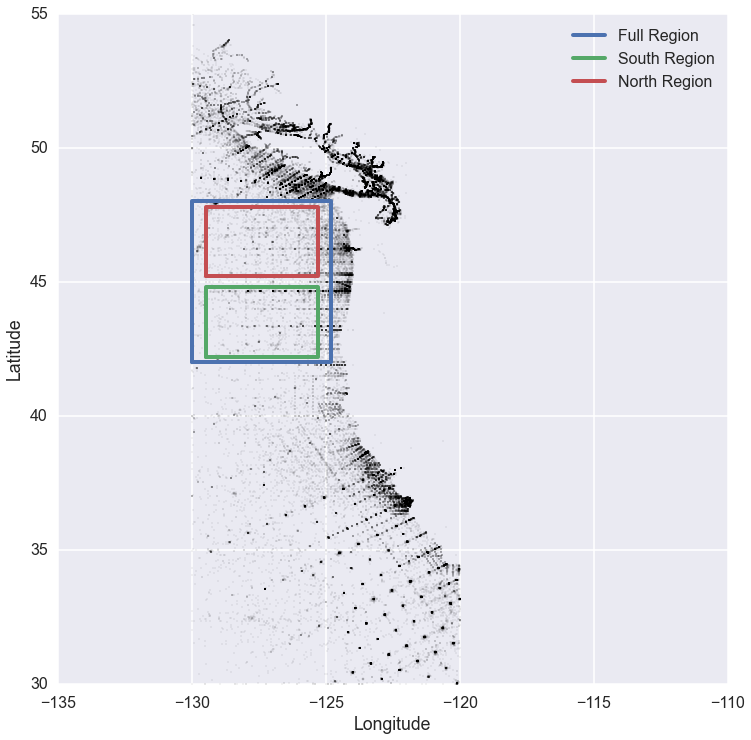

TOTAL CASTS AVAILABLE :  135748
YEARS AVAILABLE       :  1911 --- 2014


In [93]:
plt.figure(figsize=(12,12))

sns.set_style("darkgrid")
sns.set_context("poster")

lats = []
lons = []
yrs = Set([])
for cast in cast_inf:
    if 'Temperatur' in cast['Variables'] and 'Salinity' in cast['Variables']:
        lats.append(cast['Latitude'])
        lons.append(cast['Longitude'])    
        yrs.add(cast['Year'])

plt.plot(lons,lats,'.k',ms=1)

for ii in range(0,NREGIONS):
    x_bd_box = [LON_MIN[ii],LON_MAX[ii],LON_MAX[ii],LON_MIN[ii],LON_MIN[ii]]
    y_bd_box = [LAT_MIN[ii],LAT_MIN[ii],LAT_MAX[ii],LAT_MAX[ii],LAT_MIN[ii]]
    plt.plot(x_bd_box,y_bd_box,lw=4,label=REGION_IDS[ii])
    
plt.ylim((30,55))
plt.xlim((-135,-110))
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

print "TOTAL CASTS AVAILABLE : ", str(len(cast_inf))
print "YEARS AVAILABLE       : ", str(min(yrs)), "---", str(max(yrs))

###The monthly properties of T-S will be plotted for each region, and the mean values of temperature and salinity will be reported and compared to the values given by Mackas.###

#FULL REGION#

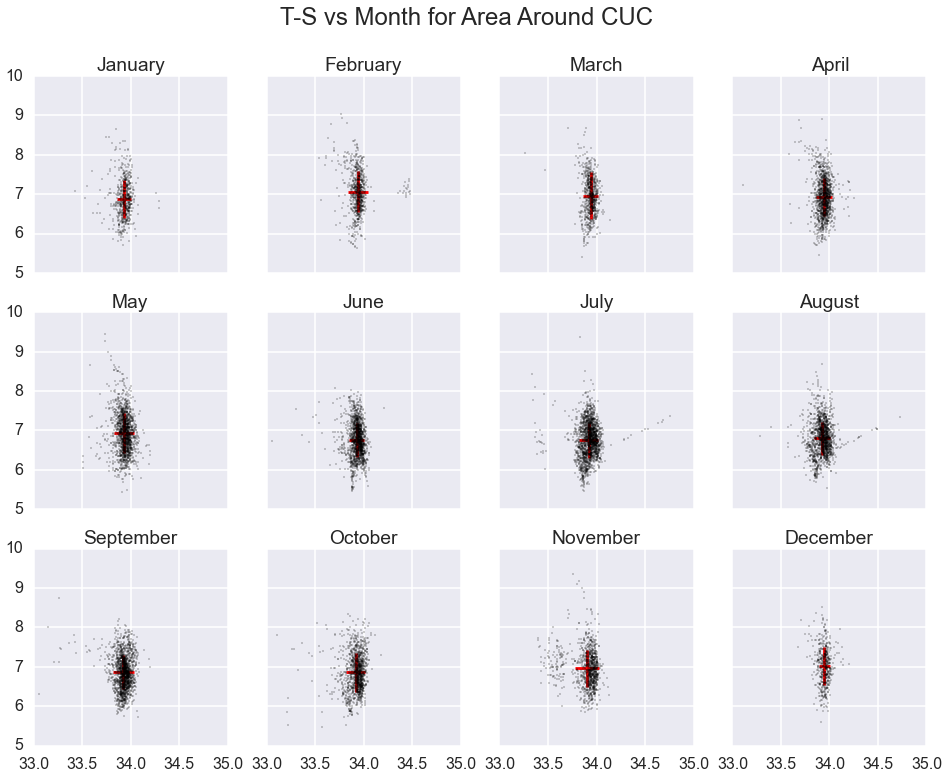

DATA FROM:  1923 --- 2008


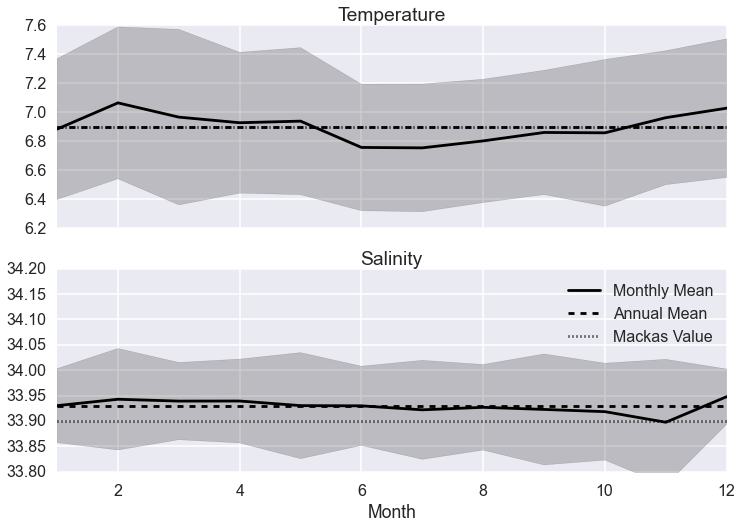

ANNUAL MEAN SALINITY    :  33.9287147552
ANNUAL MEAN TEMPERATURE :  6.89974866875


In [105]:
gen_all_plots_for_bd_box(LON_MIN[0],LON_MAX[0],LAT_MIN[0],LAT_MAX[0])

In the full region, the comparison between Mackas and observed temperature for the CUC is negligible ($<0.0003^\circ$C). However, it is apparent that the salinity values are underreported; the observed salinity here is $0.03$PSU greater than that used by Mackas.

# SOUTH REGION #

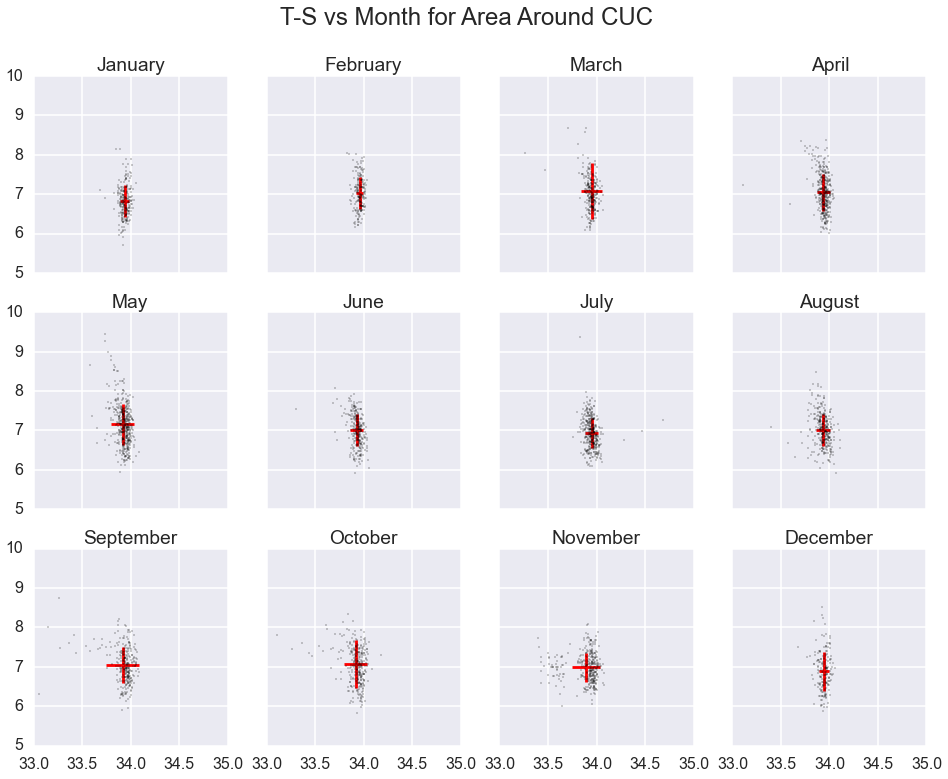

DATA FROM:  1925 --- 2008


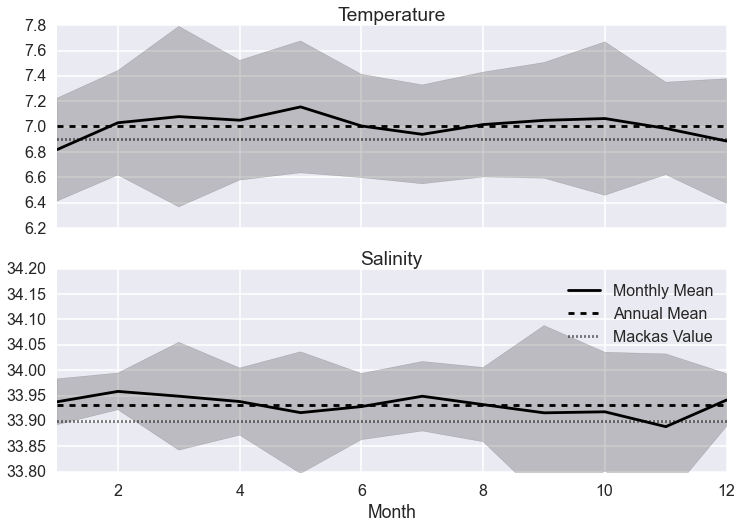

ANNUAL MEAN SALINITY    :  33.9309134007
ANNUAL MEAN TEMPERATURE :  7.0069562254


In [106]:
gen_all_plots_for_bd_box(LON_MIN[1],LON_MAX[1],LAT_MIN[1],LAT_MAX[1])

#NORTH REGION#

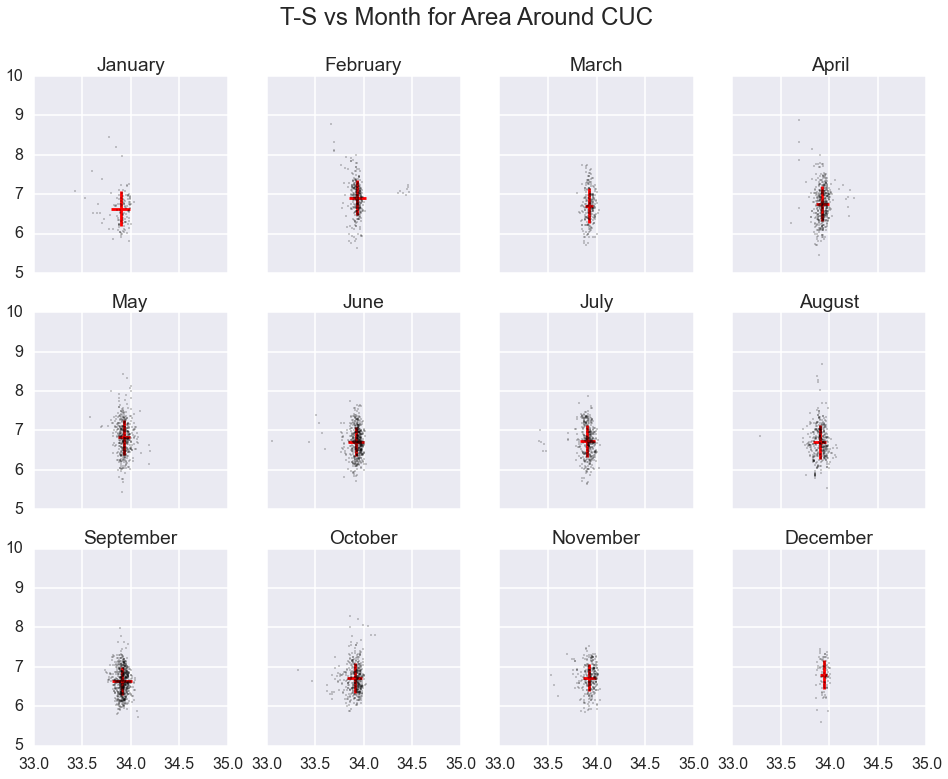

DATA FROM:  1923 --- 2008


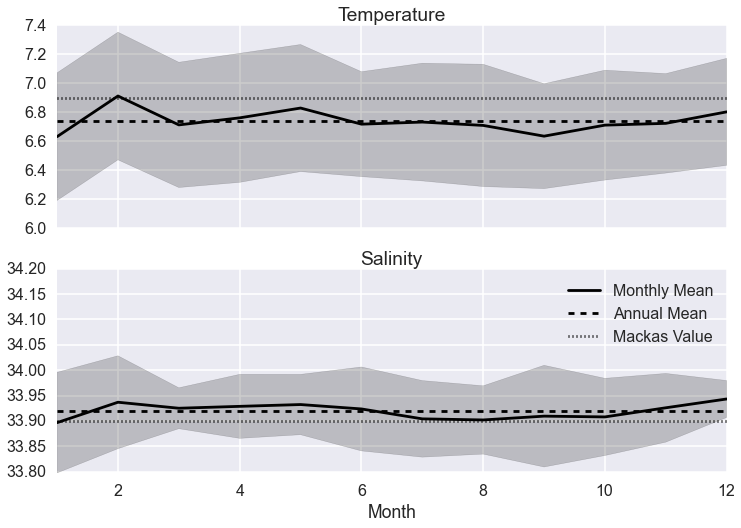

ANNUAL MEAN SALINITY    :  33.919525336
ANNUAL MEAN TEMPERATURE :  6.73925751215


In [107]:
gen_all_plots_for_bd_box(LON_MIN[2],LON_MAX[2],LAT_MIN[2],LAT_MAX[2])

In conclusion, it appears as if the salinity value is much less dependent on latitude than the temperature value. The salinity varies inversely with respect to latitude, from $33.93$ to $33.92$ PSU. The temperature varies from $7.007^\circ C$ in the south region to $6.739^\circ C$ in the norther region. This variability as CUC water moves northward is an important consideration when identifying water composition.